In [1]:
import matplotlib
import numpy as np
import cv2
import matplotlib.image as image
import matplotlib.pyplot as plt
%matplotlib inline

img = matplotlib.image.imread("test_images/hoc.jpg") 

# Scaling

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. 
The size of the image can be specified manually, or you can specify the scaling factor. 
Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking 
and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used 
is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

In [2]:
import cv2
import numpy as np

res = cv2.resize(img,None,fx=0.5, fy=2, interpolation = cv2.INTER_CUBIC)
#OR
#height, width = img.shape[:2]
#res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

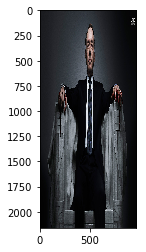

In [3]:
plt.imshow(res)

In [4]:
img.shape

(1080, 1920, 3)

In [5]:
res.shape

(2160, 960, 3)

# Translation

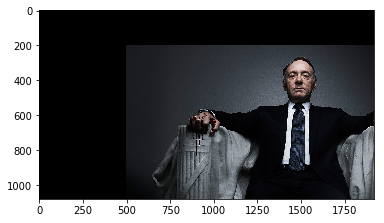

In [7]:
import cv2
import numpy as np

rows,cols = img.shape[:2]
M = np.float32([[1,0,500],[0,1,200]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
#cv2.imshow('img',dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


# Rotation


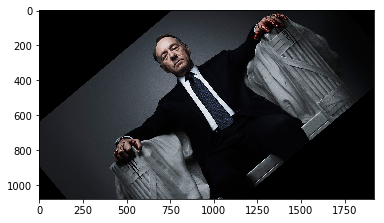

In [9]:

rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),40,1)
dst = cv2.warpAffine(img,M,(cols,rows))
#cv2.imshow('img',dst)
plt.imshow(dst)

# Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. 
To find the transformation matrix, we need three points from input image and their corresponding locations in 
output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

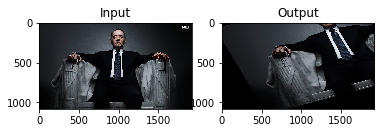

In [10]:
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. 
Straight lines will remain straight even after the transformation. To find this transformation matrix, 
you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 
3 of them should not be collinear. Then transformation matrix can be found by the function 
cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

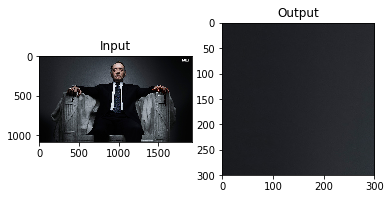

In [11]:
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()